In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks /Internship/Second Project/final_internship_data.csv', parse_dates = ['pickup_datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   User ID            500000 non-null  object        
 1   User Name          500000 non-null  object        
 2   Driver Name        500000 non-null  object        
 3   Car Condition      500000 non-null  object        
 4   Weather            500000 non-null  object        
 5   Traffic Condition  500000 non-null  object        
 6   key                500000 non-null  object        
 7   fare_amount        500000 non-null  float64       
 8   pickup_datetime    500000 non-null  datetime64[ns]
 9   pickup_longitude   500000 non-null  float64       
 10  pickup_latitude    500000 non-null  float64       
 11  dropoff_longitude  499995 non-null  float64       
 12  dropoff_latitude   499995 non-null  float64       
 13  passenger_count    500000 non-null  int64   

In [ ]:
df.describe()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,2012-03-21 00:01:25.930808064,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
min,-44.900000,2009-01-01 00:31:32,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,2010-08-19 21:02:24,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,2012-03-18 19:23:52.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,2013-10-19 05:43:45,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,2015-06-30 23:38:21,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593
std,9.916617,NaN,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548


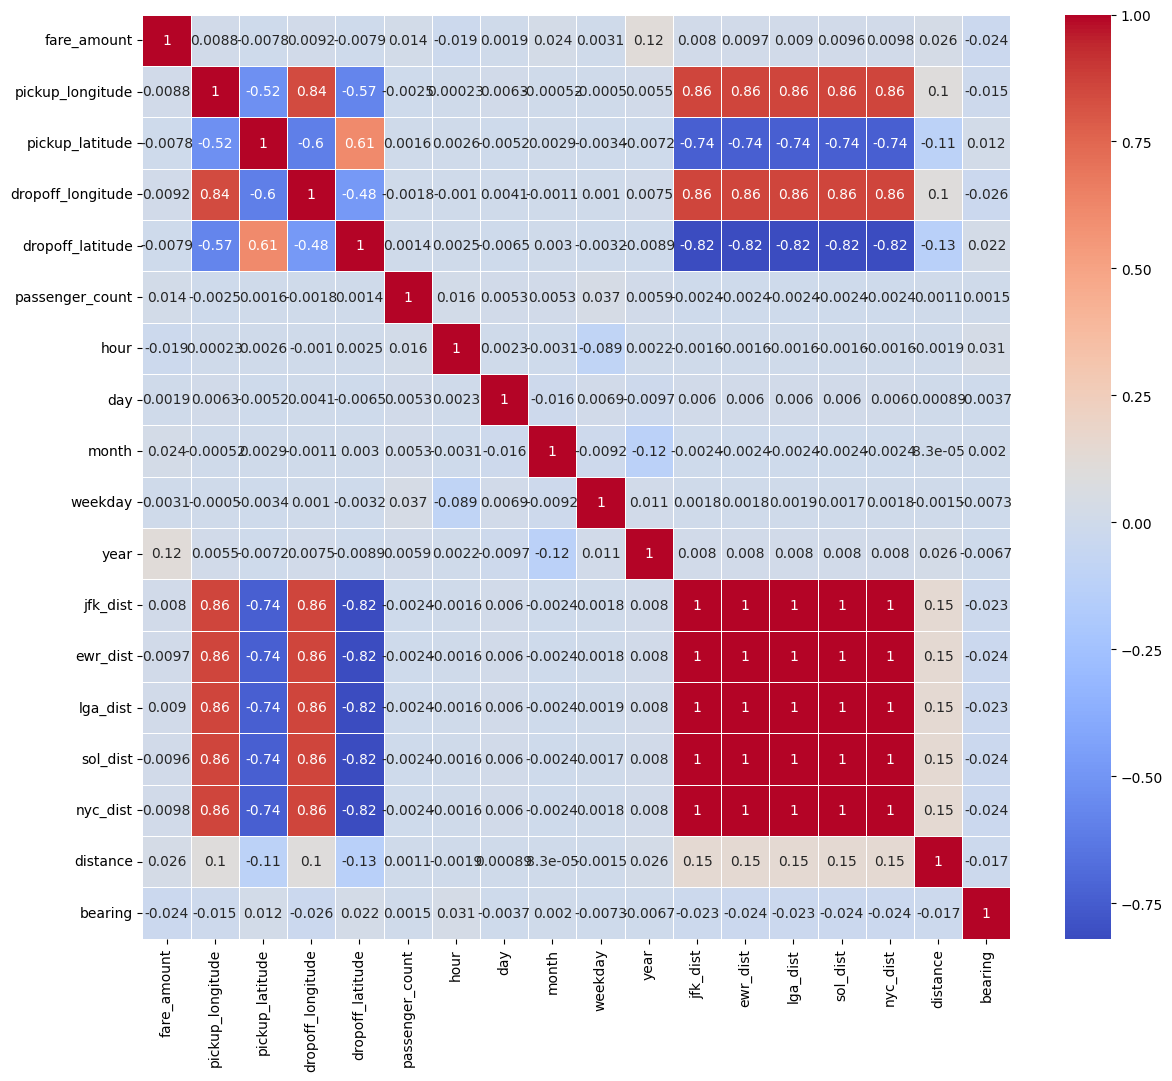

In [ ]:
corr = df.corr(numeric_only = True)
plt.figure(figsize = (14, 12))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, linewidth = 0.5)
plt.show()

In [ ]:
numerical_features = df.select_dtypes(include = (int, float))
numerical_features.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist',
       'sol_dist', 'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [ ]:
categorical_features = df.select_dtypes(object)
categorical_features.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key'],
      dtype='object')

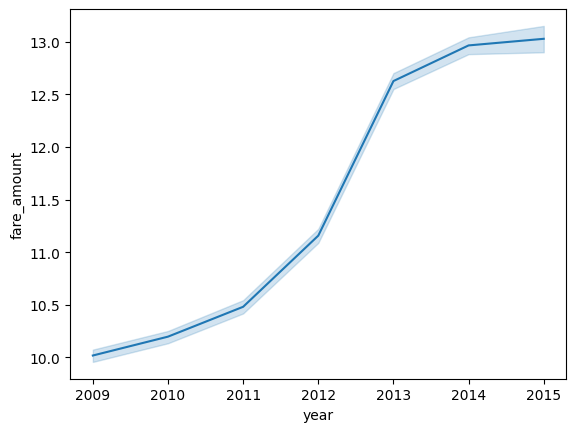

In [ ]:
sns.lineplot(data = df, x = 'year', y = 'fare_amount')
plt.show()

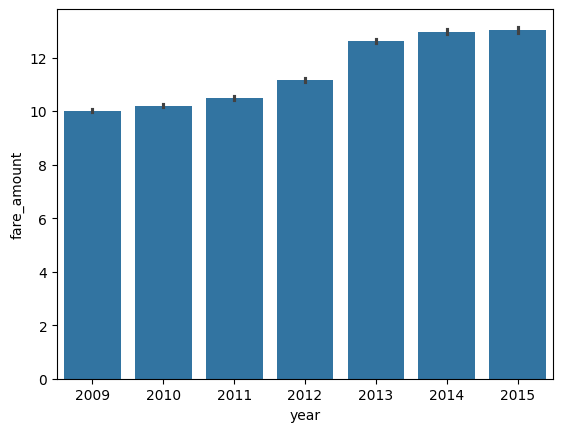

In [ ]:
sns.barplot(data = df, x = 'year', y = 'fare_amount')
plt.show()

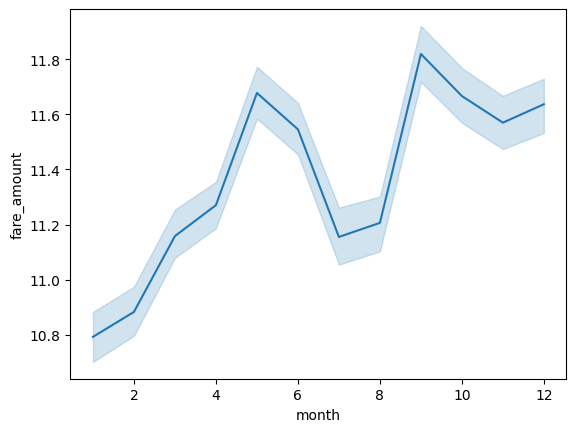

In [ ]:
sns.lineplot(data = df, x = 'month', y = 'fare_amount')
plt.show()

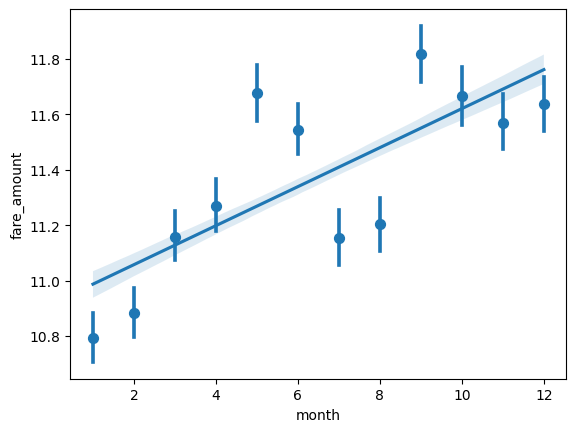

In [ ]:
sns.regplot(data = df, x = 'month', y = 'fare_amount', x_estimator = np.mean)
plt.show()

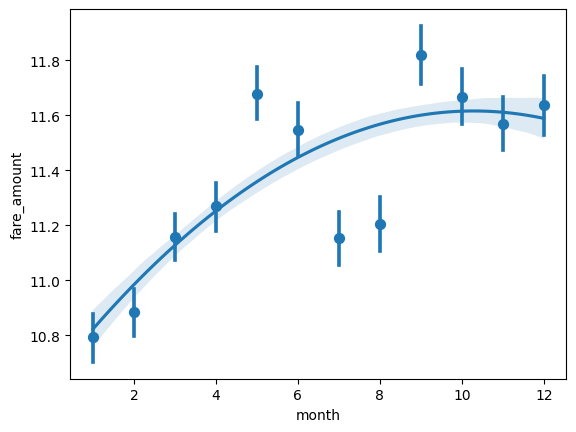

In [ ]:
sns.regplot(data = df, x = 'month', y = 'fare_amount', x_estimator = np.mean, order = 2)
plt.show()

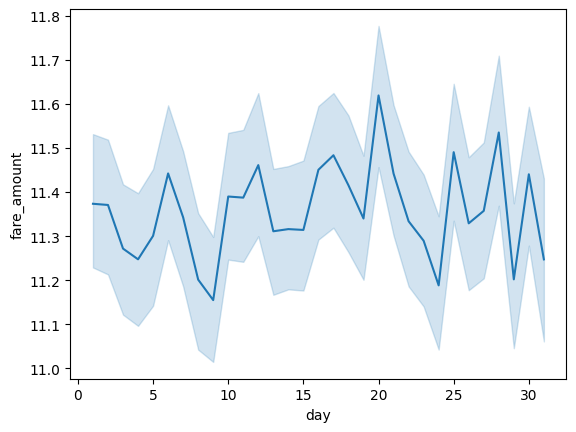

In [ ]:
sns.lineplot(data = df, x = 'day', y = 'fare_amount')
plt.show()

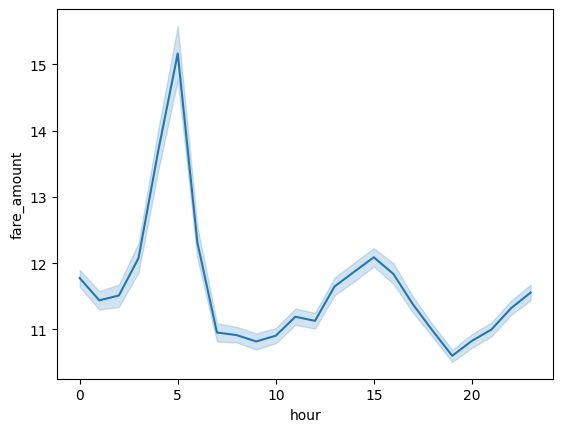

In [ ]:
sns.lineplot(data = df, x = 'hour', y = 'fare_amount')
plt.show()

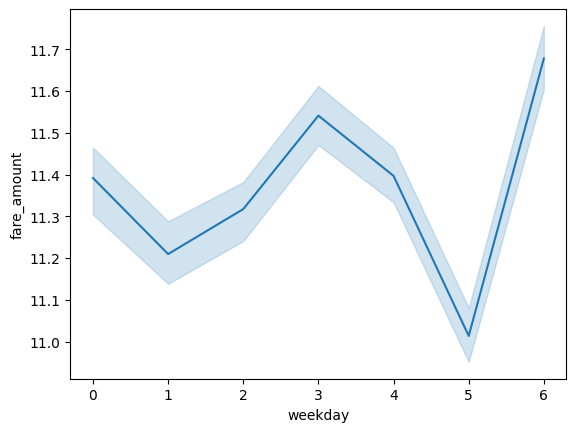

In [ ]:
sns.lineplot(data = df, x = 'weekday', y = 'fare_amount')
plt.show()

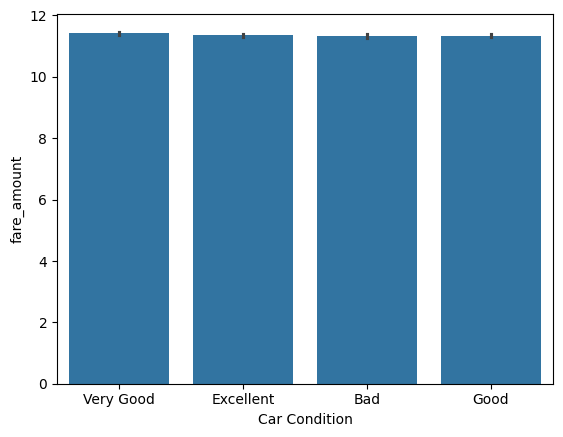

In [ ]:
sns.barplot(data = df, x = 'Car Condition', y = 'fare_amount')
plt.show()

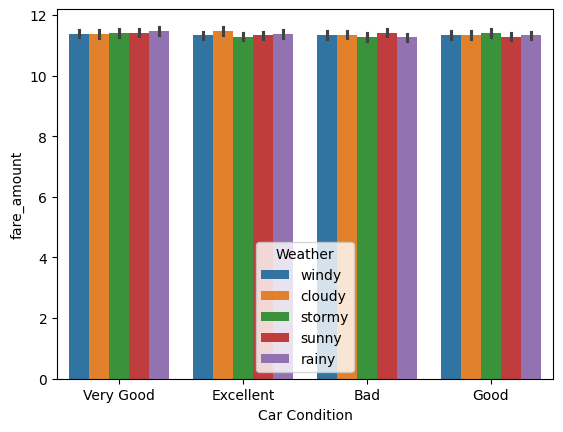

In [ ]:
sns.barplot(data = df, x = 'Car Condition', y = 'fare_amount', hue = 'Weather')
plt.show()

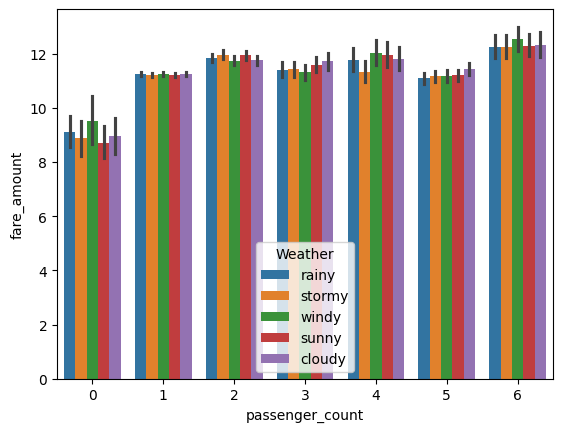

In [ ]:
sns.barplot(data = df, x = 'passenger_count', y = 'fare_amount', hue = 'Weather')
plt.show()

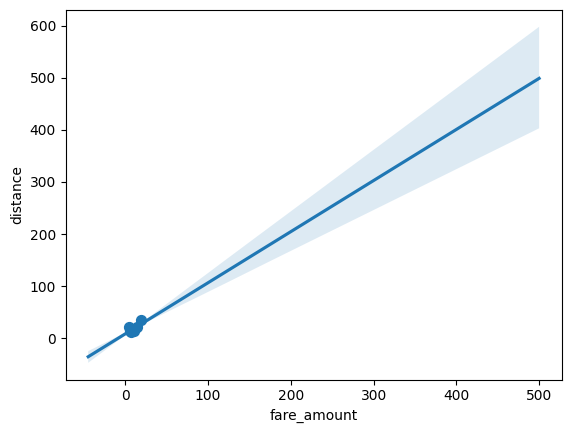

In [ ]:
sns.regplot(data = df, x = 'fare_amount', y = 'distance', fit_reg = True, x_bins = 8)
plt.show()

In [ ]:
q1 = df['distance'].quantile(0.5)
q2 = df['distance'].quantile(0.99)
min = df['distance'].min()
max = df['distance'].max()
print(f" 10th percentile: {q1}\n 99th percentile: {q2}\n Minimum Value: {min}\n Maximum Value: {max}")

 10th percentile: 2.1169703925409253
 99th percentile: 20.654822033858792
 Minimum Value: 0.0
 Maximum Value: 12399.956432774516


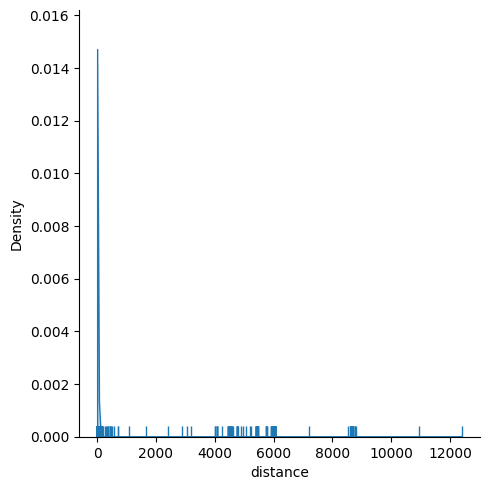

In [ ]:
sns.displot(data = df, x = 'distance', kind = 'kde', rug = True, fill = True, cut = 0)
plt.show()

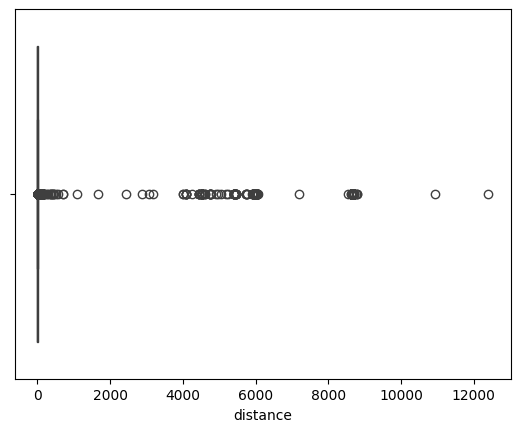

In [ ]:
sns.boxplot(data = df, x = 'distance')
plt.show()

In [ ]:
q1_fare = df['fare_amount'].quantile(0.1)
q2_fare = df['fare_amount'].quantile(0.95)
fare_amount_min_value = df['fare_amount'].min()
fare_amount_max_value = df['fare_amount'].max()

print(f" 10th percentile: {q1_fare}\n 99th percentile: {q2_fare}\n Minimum Value: {fare_amount_min_value}\n Maximum Value: {fare_amount_max_value}")

 10th percentile: 4.5
 99th percentile: 30.5
 Minimum Value: -44.9
 Maximum Value: 500.0


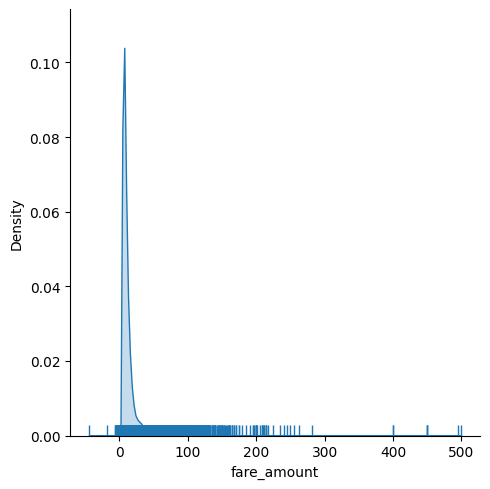

In [ ]:
sns.displot(data = df, x = 'fare_amount', kind = 'kde', rug = True, fill = True, cut = 0)
plt.show()

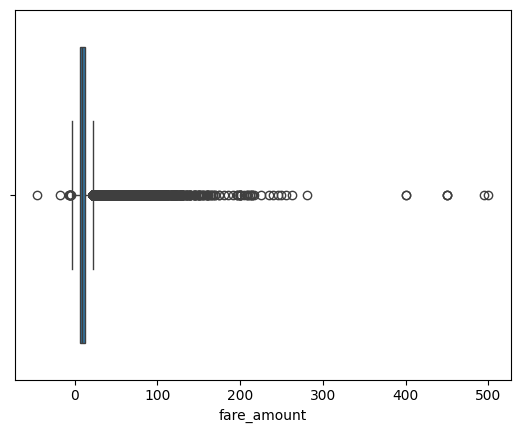

In [ ]:
sns.boxplot(data = df, x = 'fare_amount')
plt.show()